In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md
from datetime import date, datetime
%matplotlib inline
#sns.set(rc={"figure.figsize":(20, 20)})

from pandas import DataFrame
from typing import List
%matplotlib inline

In [18]:
# COLUMNS
FECHAI = 'Fecha-I'
FECHAO = 'Fecha-O'
TEMPORADA_ALTA = 'temporada_alta'
DIF_MIN = 'dif_min'
ATRASO_15 = 'atraso_15'
PERIODO_DIA = 'periodo_dia'
MORNING = 'mañana'
AFTERNOON = 'tarde'
NIGHT = 'noche'


DATE = 'Date'
TIME = 'time'
HOUR = 'hour'
MINUTE = 'minute'


STR_WINTER_START = '2017-12-15'
STR_WINTER_END = '2017-12-31'
STR_WINTER_BIS_START = '2017-01-01'
STR_WINTER_BIS_END = '2017-03-03'
STR_JULY_START = '2017-07-15'
STR_JULY_END = '2017-07-31'
STR_SEPT_START = '2017-09-11'
STR_SEPT_END = '2017-09-30'


STR_MANANA_START= '5:00'
STR_MANANA_END = '11:59'
STR_TARDE_START = '12:00'
STR_TARDE_END = '18:59'


columns = [TEMPORADA_ALTA, DIF_MIN, ATRASO_15, PERIODO_DIA]
def convert_str_to_date(str_date: str) -> datetime:
    """convert string to date format '%Y-%m-%d'

    Args:
        str_date (str): string ex: '2017-01-01'

    Returns:
        datetime: string with datetime type
    """
    return datetime.strptime(str_date, '%Y-%m-%d').date()

def convert_str_to_time(str_date: str) -> datetime:
    """convert string to time format '%H:%M'

    Args:
        str_date (str): string '23:59'

    Returns:
        datetime: string with datetime type
    """
    return datetime.strptime(str_date, '%H:%M').time()

def add_temporada_alta_flag(df: DataFrame, dates: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    df[TEMPORADA_ALTA] = 0
    for date in dates:
        df.loc[(df[DATE] >= date[0]) & (df[DATE]<=date[1]), TEMPORADA_ALTA] = 1
    return df.copy()
def add_periodo_dia_flag(df: DataFrame, times: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    # default
    df[PERIODO_DIA] = NIGHT
    df.loc[(df[TIME] >= times[0][0]) & (df[TIME]<=times[0][1]), PERIODO_DIA] = MORNING
    df.loc[(df[TIME] >= times[1][0]) & (df[TIME]<=times[1][1]), PERIODO_DIA] = AFTERNOON
    return df.copy()

In [24]:
def generate_temporada_alta_set()-> list:
    """
    This function generate arrays to generate temporada_alta elements, source from constant
    dates ahre the following, 
        15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep,
    output: array of element, with the following 
    """
    str_winter_start = convert_str_to_date(STR_WINTER_START)
    str_winter_end = convert_str_to_date(STR_WINTER_END)
    str_winter_bis_start = convert_str_to_date(STR_WINTER_BIS_START)
    str_winter_bis_end = convert_str_to_date(STR_WINTER_BIS_END)
    str_July_start = convert_str_to_date(STR_JULY_START)
    str_July_end = convert_str_to_date(STR_JULY_END)
    str_Sept_start = convert_str_to_date(STR_SEPT_START)
    str_Sept_end = convert_str_to_date(STR_SEPT_END)

    dates = [[str_winter_start, str_winter_end],
             [str_winter_bis_start, str_winter_bis_end],
             [str_July_start, str_July_end],
             [str_Sept_start, str_Sept_end]]
    return dates

def generate_day_section():
    """
    split a day iin three part, morning, afternoon and night
    """
    str_mañana_start = convert_str_to_time(STR_MANANA_START)
    str_mañana_end = convert_str_to_time(STR_MANANA_END)
    str_tarde_start = convert_str_to_time(STR_TARDE_START)
    str_tarde_end = convert_str_to_time(STR_TARDE_END)
    times = [[str_mañana_start, str_mañana_end],
             [str_tarde_start, str_tarde_end],
            ]
    return times

def split_date(df:DataFrame, column_name:str)-> DataFrame:
    """_summary_

    Args:
        df (DataFrame): _description_
        column_name (str): _description_

    Returns:
        DataFrame: _description_
    """
    df[column_name] = pd.to_datetime(df[column_name])
    df[DATE] = df[column_name].dt.date
    df[TIME] = df[column_name].dt.time
    return df.copy()

def add_temporada_alta_flag(df: DataFrame, dates: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    df[TEMPORADA_ALTA] = 0
    for date in dates:
        df.loc[(df[DATE] >= date[0]) & (df[DATE]<=date[1]), TEMPORADA_ALTA] = 1
    return df.copy()

def add_periodo_dia_flag(df: DataFrame, times: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    # default
    df[PERIODO_DIA] = NIGHT
    df.loc[(df[TIME] >= times[0][0]) & (df[TIME]<=times[0][1]), PERIODO_DIA] = MORNING
    df.loc[(df[TIME] >= times[1][0]) & (df[TIME]<=times[1][1]), PERIODO_DIA] = AFTERNOON
    return df.copy()

def add_dif_min_and_atraso_15(df:DataFrame) ->DataFrame:
    df[DIF_MIN] = df[FECHAO]-df[FECHAI]
    df[DIF_MIN] = df[DIF_MIN].dt.total_seconds()//60
    df[ATRASO_15] = 0
    df.loc[df[DIF_MIN]>15, ATRASO_15] = 1
    return df



In [25]:
df = pd.read_csv("../sources/raw/dataset_SCL.csv", dtype={'Vlo-O':str, 'Vlo-I':str})

In [26]:
df[FECHAO] = pd.to_datetime(df[FECHAO])

In [27]:
dates = generate_temporada_alta_set()
times = generate_day_section()

In [28]:
df = (df.pipe(split_date, FECHAI)
        .pipe(add_temporada_alta_flag, dates)
        .pipe(add_periodo_dia_flag, times)
        .pipe(add_dif_min_and_atraso_15)
     )

# delay more than 15 minutes

In [29]:
to_plot = df.groupby([DATE, ATRASO_15])[ATRASO_15].count().rename("count")
to_plot = to_plot.reset_index()

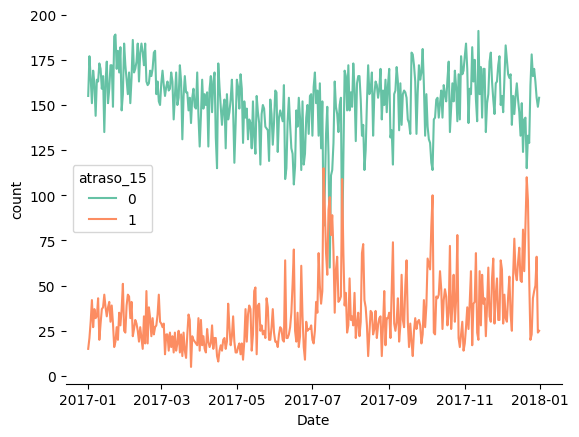

In [30]:
sns.lineplot(x=DATE, y = 'count', data = to_plot, palette = sns.color_palette("Set2",2), hue = ATRASO_15)
sns.despine(left=True)

In [31]:
to_plot = df.groupby([DATE,'TIPOVUELO', PERIODO_DIA, ATRASO_15, ])[ATRASO_15].count().rename("count")
to_plot = to_plot.reset_index()

# Delay by flight type

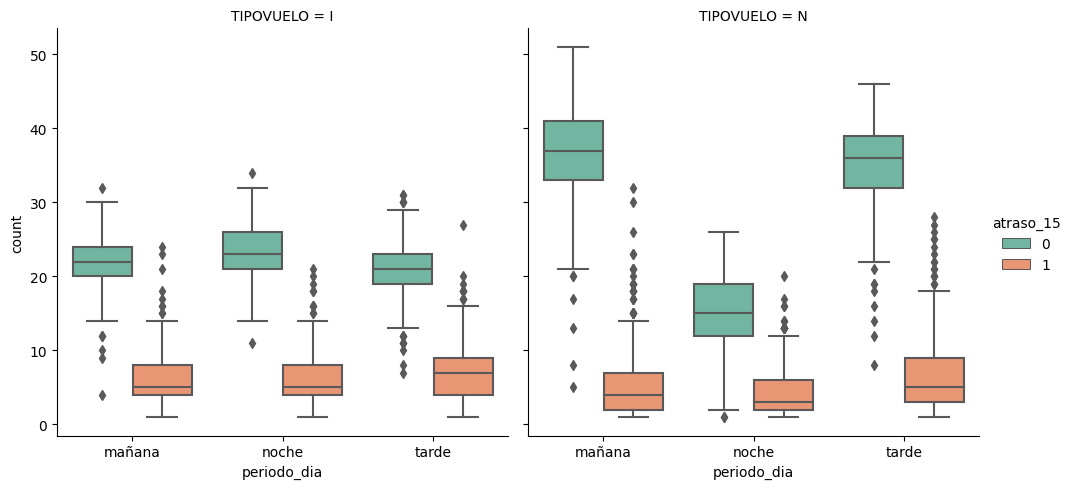

In [32]:
bar = sns.catplot(x=PERIODO_DIA, y="count", data=to_plot, hue=ATRASO_15, col='TIPOVUELO',kind="box", palette = sns.color_palette("Set2",2)) 


In [33]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Date', 'time', 'temporada_alta',
       'periodo_dia', 'dif_min', 'atraso_15'],
      dtype='object')

In [34]:
top = df[df[ATRASO_15]==1]['OPERA'].value_counts().sort_values(ascending=False).head(2).index.tolist()
to_plot = df[df['OPERA'].isin(top)].groupby([DATE,'OPERA', PERIODO_DIA, ATRASO_15, ])[ATRASO_15].count().rename("count")
to_plot = to_plot.reset_index()

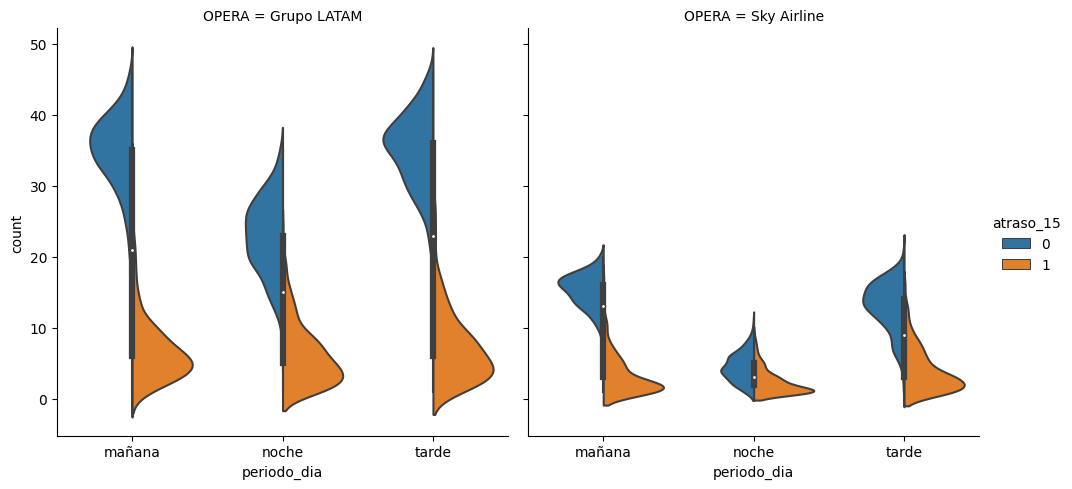

In [35]:
bar = sns.catplot(x=PERIODO_DIA, y="count", data=to_plot, hue=ATRASO_15, col='OPERA',kind="violin", split=True)# palette = sns.color_palette("Paired",2)) 


In [36]:
top = df[(df[ATRASO_15]==1) & (df['TIPOVUELO']=='I') ]['Des-I'].value_counts().sort_values(ascending=False).head(3).index.tolist()
to_plot = df[df['Des-I'].isin(top)].groupby([DATE,'Des-I', PERIODO_DIA, ATRASO_15, ])[ATRASO_15].count().rename("count")
to_plot = to_plot.reset_index()

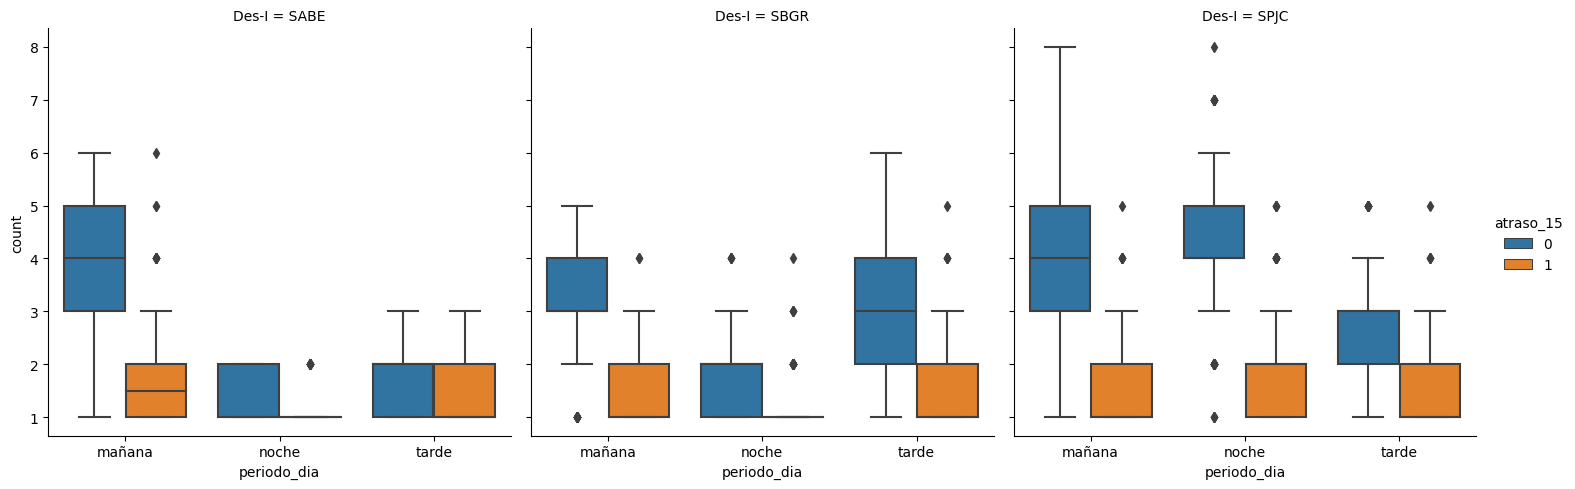

In [37]:
bar = sns.catplot(x=PERIODO_DIA, y="count", data=to_plot, hue=ATRASO_15, col='Des-I',kind="box",)# palette = sns.color_palette("Paired",2)) 


Review if there is difference between the programmed vs operation

In [38]:
# Rate

In [39]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby(['Des-I', ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index().head(10)

,Des-I,atraso_15,count
0,CYYZ,0,0.685512
1,CYYZ,1,0.314488
2,EGLL,0,0.858537
3,EGLL,1,0.141463
4,EGYP,1,1.000000
5,KATL,0,0.941341
6,KATL,1,0.058659
7,KDFW,0,0.929972
8,KDFW,1,0.070028
9,KIAH,0,0.949254


In [40]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby(['Emp-I', ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index().head(10)

,Emp-I,atraso_15,count
0,AAL,0,0.932629
1,AAL,1,0.067371
2,ACA,0,0.543363
3,ACA,1,0.456637
4,AFR,0,0.916201
5,AFR,1,0.083799
6,AMX,0,0.971510
7,AMX,1,0.028490
8,ARG,0,0.759877
9,ARG,1,0.240123


In [41]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby([DATE, ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index()

,Date,atraso_15,count
0,2017-01-01,0,0.911765
1,2017-01-01,1,0.088235
2,2017-01-02,0,0.893939
3,2017-01-02,1,0.106061
4,2017-01-03,0,0.846154
...,...,...,...
725,2017-12-29,1,0.300000
726,2017-12-30,0,0.861272
727,2017-12-30,1,0.138728
728,2017-12-31,0,0.860335


In [42]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby(['DIANOM', ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index().head(10)

,DIANOM,atraso_15,count
0,Domingo,0,0.838914
1,Domingo,1,0.161086
2,Jueves,0,0.800507
3,Jueves,1,0.199493
4,Lunes,0,0.797848
5,Lunes,1,0.202152
6,Martes,0,0.830884
7,Martes,1,0.169116
8,Miercoles,0,0.829150
9,Miercoles,1,0.170850


In [43]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby([TEMPORADA_ALTA, ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index().head(10)

,temporada_alta,atraso_15,count
0,0,0,0.82079
1,0,1,0.17921
2,1,0,0.80362
3,1,1,0.19638


In [44]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby([TEMPORADA_ALTA, ATRASO_15])[ATRASO_15].count().rename("count")
rate.reset_index().head(10)

,temporada_alta,atraso_15,count
0,0,0,37300
1,0,1,8144
2,1,0,18292
3,1,1,4470


In [45]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby(['TIPOVUELO', ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index().head(10)

,TIPOVUELO,atraso_15,count
0,I,0,0.774392
1,I,1,0.225608
2,N,0,0.849429
3,N,1,0.150571


Other variables

# airline code

In [46]:
df[df['Emp-I'] != df['Emp-O']]['atraso_15'].value_counts()

0    15308
1     3361
Name: atraso_15, dtype: int64

# Destination 

In [47]:
df[df['Des-I'] != df['Des-O']]['atraso_15'].value_counts()

0    20
1     8
Name: atraso_15, dtype: int64

# Flight number

In [48]:
df[df['Vlo-I'] != df['Vlo-O']]['atraso_15'].value_counts()

0    3364
1    1155
Name: atraso_15, dtype: int64

# Distribution between months

In [49]:
rate = df.sort_values(ATRASO_15,ascending=False).groupby(['MES', ATRASO_15])[ATRASO_15].count().rename("count")
rate = rate / rate.groupby(level=0).sum()
rate.reset_index()

,MES,atraso_15,count
0,1,0,0.839882
1,1,1,0.160118
2,2,0,0.848409
3,2,1,0.151591
4,3,0,0.884896
5,3,1,0.115104
6,4,0,0.883466
7,4,1,0.116534
8,5,0,0.842176
9,5,1,0.157824


# Cohorts

We currently have only one year of data, with this is not possible to identify seasoning internal holidays where the space aire can be limited and generate other delays. Another way to separete the data is by detecting the delays in high season and not. so one way is to saparete the information in high season, and the other is by cohorts or blocks by trimester. 



The trimester, periods or cohort used are the following

* First cohort between 2017-01-01 00:00:00 and 2017-04-01 00:00:00
* Second cohort between 2017-04-01 00:00:00 and 2017-07-01 00:00:00
* Third cohort between 2017-07-01 00:00:00 and 2017-10-01 00:00:00
* Fourth cohort between 2017-10-01 00:00:00 and 2018-01-01 00:00:00